### The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. 

#### The following describes the dataset columns:

 CRIM - per capita crime rate by town

 ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

 INDUS - proportion of non-retail business acres per town.

 CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

 NOX - nitric oxides concentration (parts per 10 million)

 RM - average number of rooms per dwelling

 AGE - proportion of owner-occupied units built prior to 1940

 DIS - weighted distances to five Boston employment centres

 RAD - index of accessibility to radial highways

 TAX - full-value property-tax rate per  $10,000

 PTRATIO - pupil-teacher ratio by town

 B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

 LSTAT - % lower status of the population

 MEDV - Median value of owner-occupied homes in $1000's


### Importing the required Libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the Dataset

In [31]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('Housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(df.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


### Data preprocessing

In [32]:
df.shape

(506, 14)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [34]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Columns like CRIM, ZN, RM, B seems to have outliers. Let's see the outliers percentage in every column.

In [35]:
for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


##  Visualization of the Data

C:\Users\SECRETARY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SECRETARY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SECRETARY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

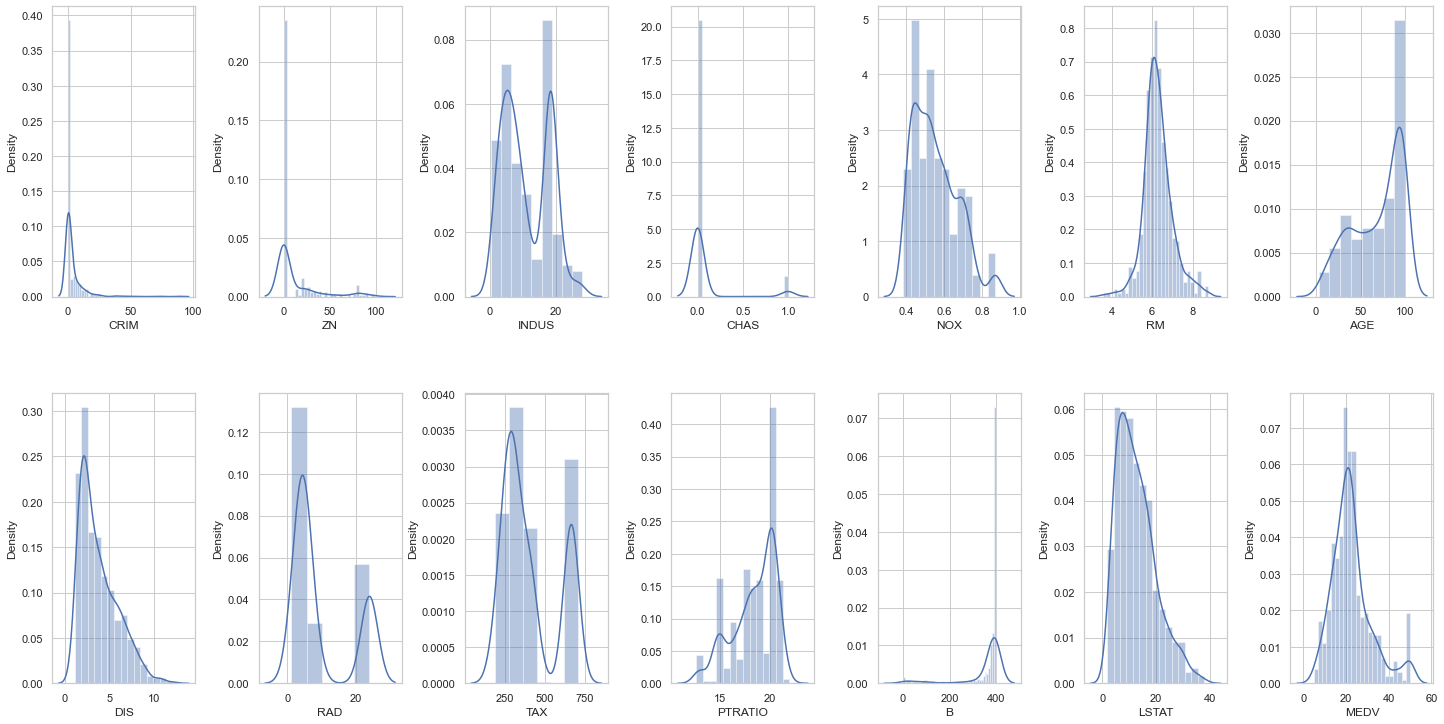

In [36]:
#  Let's see how these features plus MEDV distributions looks like

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


<AxesSubplot:>

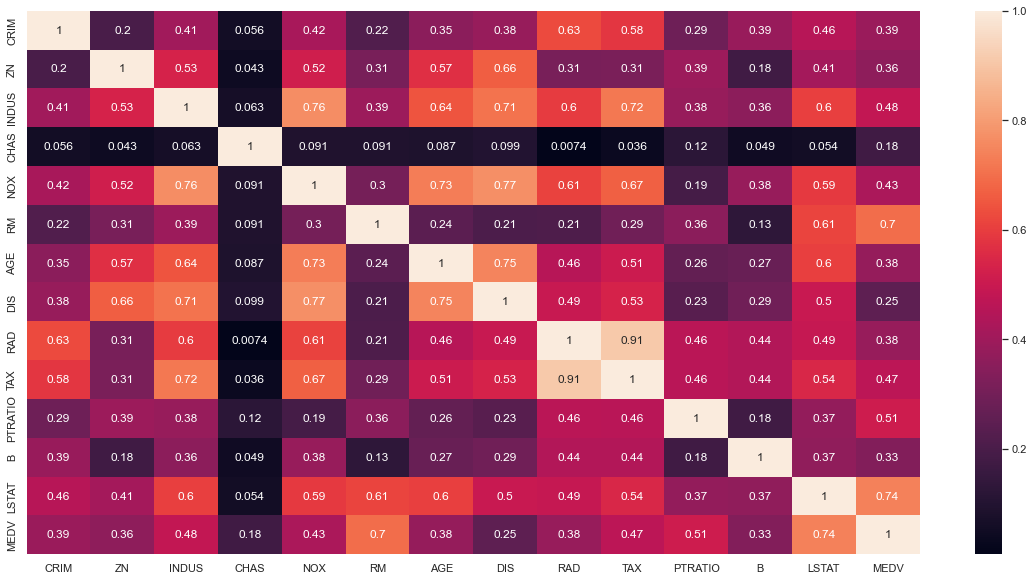

In [37]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV which is a good indication of using as predictors.

### Let’s first plot the distribution of the target variable MEDV

C:\Users\SECRETARY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


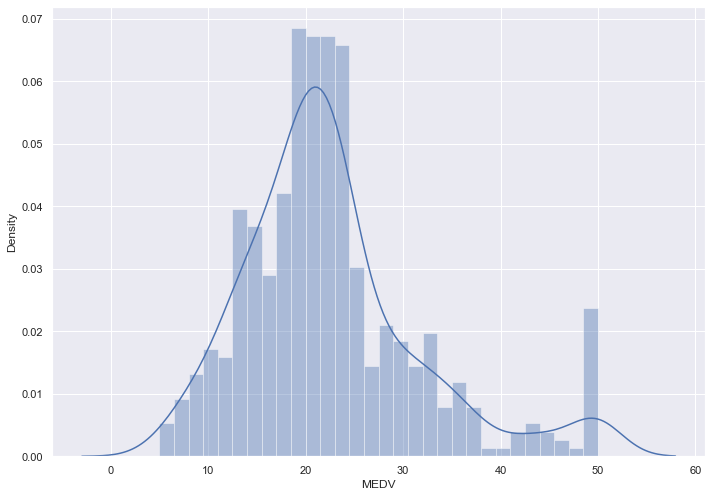

In [38]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

### We will use RM and LSTAT as our features. Using a scatter plot let’s see how these features vary with MEDV.

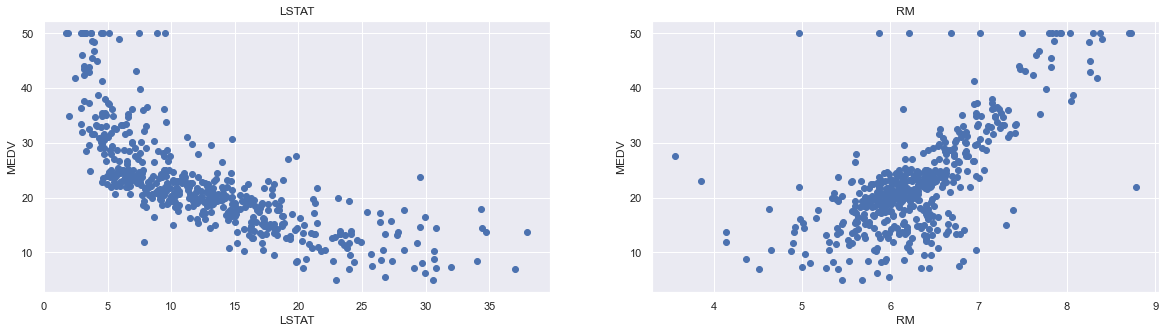

In [39]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

<AxesSubplot:xlabel='RAD', ylabel='count'>

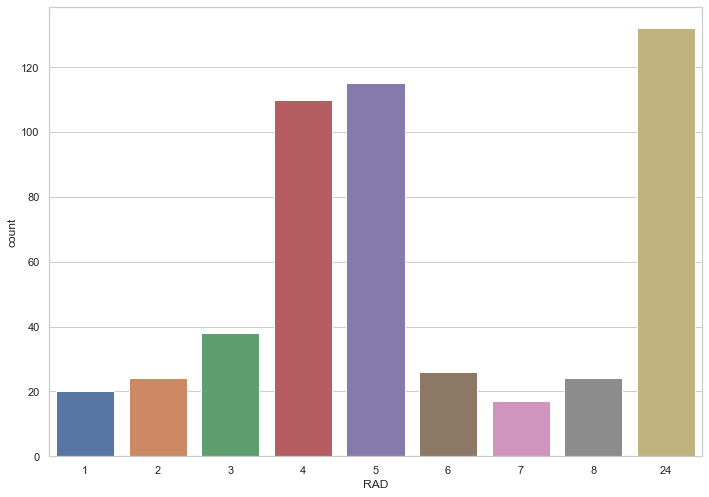

In [40]:
sns.set_style('whitegrid')
sns.countplot(x='RAD',data=df)

<AxesSubplot:xlabel='CHAS', ylabel='count'>

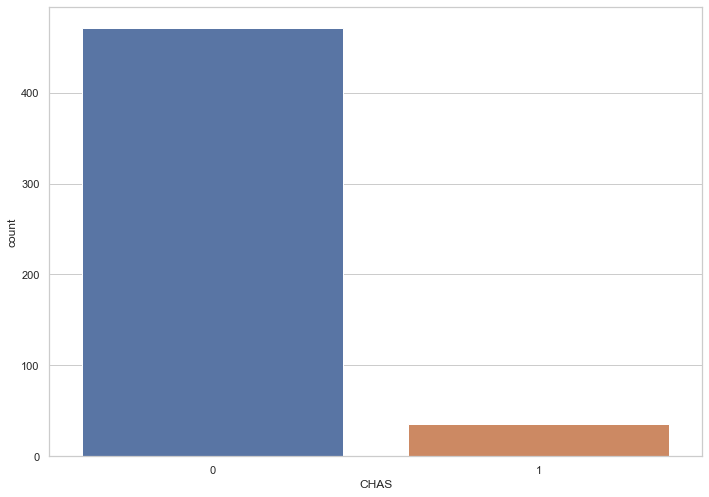

In [41]:
sns.set_style('whitegrid')
sns.countplot(x='CHAS',data=df)

<AxesSubplot:xlabel='CHAS', ylabel='count'>

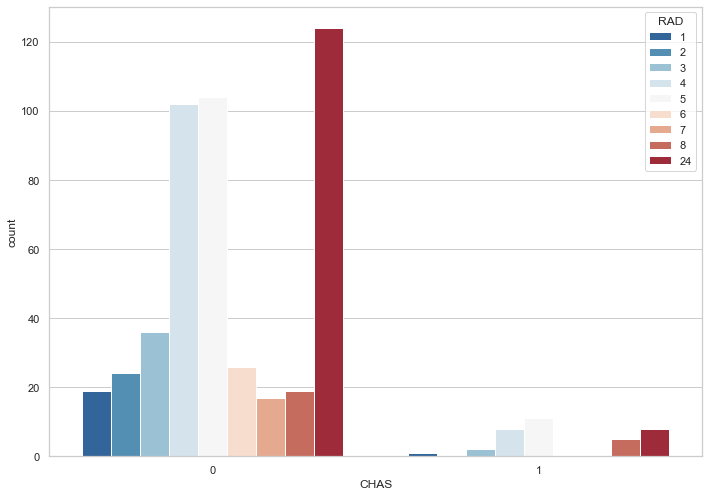

In [42]:
sns.set_style('whitegrid')
sns.countplot(x='CHAS',hue='RAD',data=df,palette='RdBu_r')

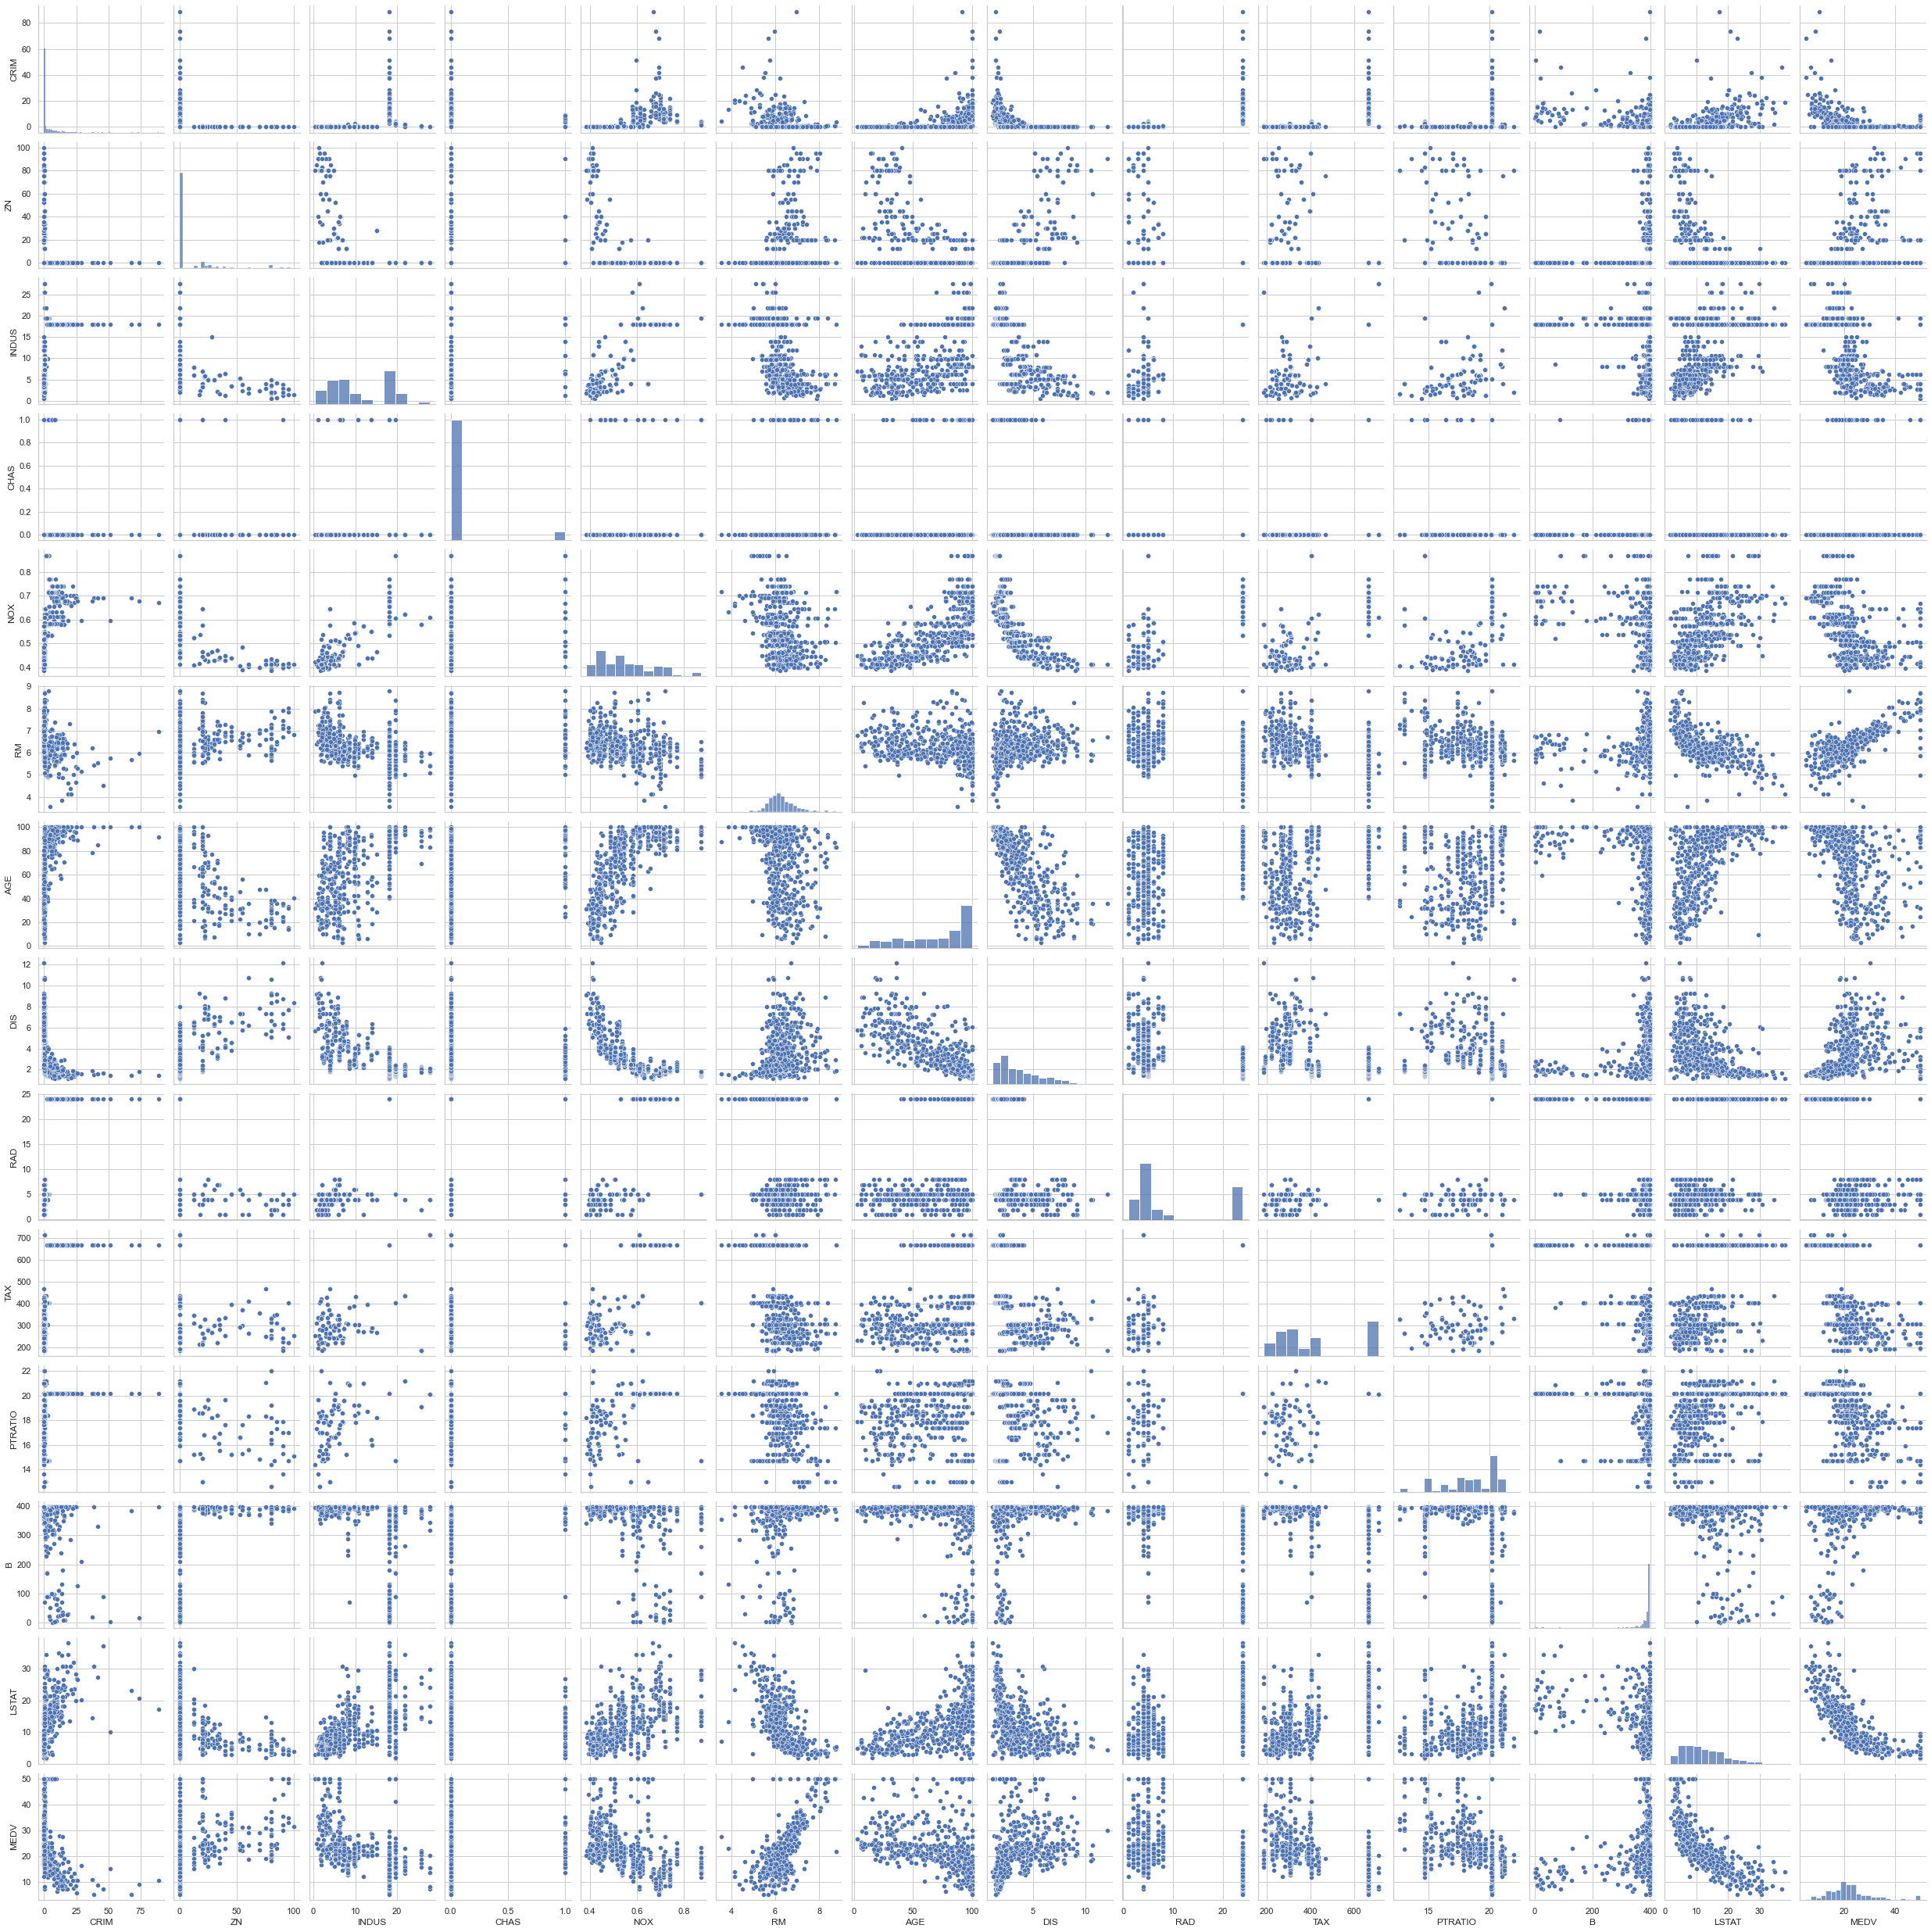

In [43]:
sns.pairplot(df)
plt.show()

###  Defining a Class for POLNOMIAL REGRESSION

In [44]:


class PolynomialRegression:
    def __init__(self, degree, learning_rate=0.01, epochs=100):
        self.degree = degree
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.losses = []
        
    def _polynomial_features(self, X):
        X_poly = np.ones((X.shape[0], 1))
        for d in range(1, self.degree+1):
            X_poly = np.hstack((X_poly, X**d))
        return X_poly
    
    
    def train(self, X_train, y_train):
        X_poly = self._polynomial_features(X_train)
        self.weights = np.random.randn(X_poly.shape[1])
        for epoch in range(self.epochs):
            y_pred = self._predict(X_train)
            error = y_pred - y_train
            gradient = np.dot(X_poly.T, error) / X_poly.shape[0]
            self.weights -= self.learning_rate * gradient
            mse_loss = np.mean((y_train - y_pred)**2)
            self.losses.append(mse_loss)
    
    def test(self, X_test, y_test):
        y_pred = self._predict(X_test)
        mse_loss = np.mean((y_test - y_pred)**2)
        return mse_loss
    
    def predict(self, X):
        # Add a column of ones to X to represent the intercept term
        X = np.column_stack((np.ones(len(X)), X))
        # Generate polynomial features up to degree
        for i in range(2, self.degree+1):
            X = np.column_stack((X, X[:,1]**i))
        # Compute the predicted values using the coefficients
        y_pred = X @ self.coefficients
        return y_pred
    
    
    def fit(self, X, y):
        # Add a column of ones to X to represent the intercept term
        X = np.column_stack((np.ones(len(X)), X))
        # Generate polynomial features up to degree
        for i in range(2, self.degree+1):
            X = np.column_stack((X, X[:,1]**i))
        # Compute the coefficients using the normal equation
        self.coefficients = np.linalg.inv(X.T @ X) @ X.T @ y
    
    def plot_loss(self):
        plt.plot(self.losses)
        plt.title("Loss over epochs")
        plt.xlabel("Epochs")
        plt.ylabel("MSE Loss")
        plt.show()
        
    def pred_to_plot(self, X, y):
        X_poly = self._polynomial_features(X)
        y_pred = np.dot(X_poly, self.weights)
        plt.scatter(X, y)
        plt.plot(X, y_pred, c='r')
        plt.title("Predicted vs Actual")
        plt.xlabel("X")
        plt.ylabel("y")
        plt.show()

def split_data(X, y, test_size):
    # Randomly permute the data
    permuted_indices = np.random.permutation(len(X))
    X_permuted = X[permuted_indices]
    y_permuted = y[permuted_indices]
    # Split the data into train and test sets
    split_index = int((1 - test_size) * len(X))
    X_train = X_permuted[:split_index]
    y_train = y_permuted[:split_index]
    X_test = X_permuted[split_index:]
    y_test = y_permuted[split_index:]
    return X_train, y_train, X_test, y_test



### Spliting the data into train and test sets

In [45]:
X = df.iloc[:, 0:13].values
y = df.iloc[:, 13].values.reshape(-1,1)

In [46]:
# Split the data into train and test sets
X_train, y_train, X_test, y_test = split_data(X, y, test_size=0.2)


In [47]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


### Fitting the Polynomial Regression Model  

In [48]:
# Fit a polynomial regression model with degree=3
poly_reg = PolynomialRegression(degree=3)
poly_reg.fit(X_train, y_train)


## Evaluation matrics - MSE, RMSE 

In [54]:
# Predict on the test set and compute the mean squared error
y_pred = poly_reg.predict(X_test)
mse = np.mean((y_pred - y_test)**2)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 27.01


In [50]:
def r2_score(y_true, y_pred):
    # Calculate the mean of the true values
    mean_y = sum(y_true) / len(y_true)
    
    # Calculate the total sum of squares (TSS)
    tss = sum((y_i - mean_y) ** 2 for y_i in y_true)
    
    # Calculate the residual sum of squares (RSS)
    rss = sum((y_i - y_pred[i]) ** 2 for i, y_i in enumerate(y_true))
    
    # Calculate the R2 score
    r2 = 1 - (rss / tss)
    
    return r2


In [51]:
y_pred = poly_reg.predict(X)
r2 = r2_score(y, y_pred)


In [52]:
print(f"R2 Score: {r2}")

R2 Score: [0.73484927]


In [53]:
rmse = np.sqrt(mse)
print("Root mean squared error:", rmse)

Root mean squared error: 5.196799390859689
